<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/Insuranceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import pandas as pd


# Getting the dataset

In [2]:
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Since there are few non numeric values we have to do one hot encoding

one hot encoding using pandas

In [3]:
new_data=pd.get_dummies(insurance)
print(new_data)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

# creating features and labels


In [4]:
x = new_data.drop('charges',axis=1) # creating features
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [5]:
y = new_data.charges # created labels
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Spliting the data between training and test Using sicket learn

In [6]:
'''
x_train=x[:1068]
x_test=x[1068:]

y_train=y[:1068]
y_test=y[1068:]
      '''
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#checking the split
print('Number of total samples in features:', len(x))
print('Number of samples in training features:', len(x_train))
print('Number of samples in testing features:', len(x_test))
print('Number of total samples in labels:', len(y))
print('Number of samples in training labels:', len(y_train))
print('Number of samples in testing labels:', len(y_test))

Number of total samples in features: 1338
Number of samples in training features: 1070
Number of samples in testing features: 268
Number of total samples in labels: 1338
Number of samples in training labels: 1070
Number of samples in testing labels: 268


# BUILDING THE MODEL


In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
    metrics=['mae']
)

history=model.fit(x_train,y_train,epochs=100,verbose=0)

In [44]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                120       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Evaluating the model

In [45]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6727.1919 - mae: 6727.1919


[6727.19189453125, 6727.19189453125]

# Improving the model

In [37]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name='input_layer'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1, name='output_layer')
])

model2.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
    metrics=['mae']
)

history=model2.fit(x_train,y_train,epochs=100,verbose=0)

#Evaluating the model

In [38]:
model2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 6584.2998 - mae: 6584.2998


[6584.2998046875, 6584.2998046875]

# IMPROVING THE MODEL AGAIN

In [40]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name='input_layer'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1, name='output_layer')
])

model3.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

history=model2.fit(x_train,y_train,epochs=100,verbose=0)

# Evaluating the new model

In [35]:
model3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3418.9236 - mae: 3418.9236


[3418.923583984375, 3418.923583984375]

# Ploting the history variable
the history variable consists dta abut training process such as loss and other metrics

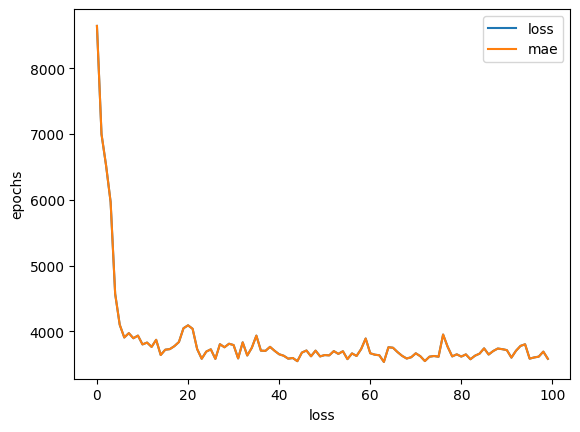

In [36]:
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.xlabel('loss')
plt.ylabel('epochs')
plt.show()
